In [1]:
import pandas as pd
import random

# Define features based on cervical cancer risk factors (simplified for demo purposes)
features = [
    "age", "num_pregnancies", "smokes", "hpv_positive", "sexual_partners",
    "early_sexual_activity", "stds", "irregular_bleeding", "contraceptive_use"
]

# Define how many samples to generate
n_samples = 500

# Generate synthetic dataset
data = []
for _ in range(n_samples):
    age = random.randint(18, 65)
    num_pregnancies = random.randint(0, 6)
    smokes = random.choice([0, 1])
    hpv_positive = random.choice([0, 1])
    sexual_partners = random.randint(1, 10)
    early_sexual_activity = random.choice([0, 1])
    stds = random.choice([0, 1])
    irregular_bleeding = random.choice([0, 1])
    contraceptive_use = random.choice([0, 1])

    # Simple logic for labeling risk
    risk_score = (
        0.3 * hpv_positive +
        0.2 * smokes +
        0.1 * early_sexual_activity +
        0.1 * stds +
        0.1 * irregular_bleeding +
        0.05 * contraceptive_use +
        0.05 * (age > 45) +
        0.05 * (sexual_partners > 5) +
        0.05 * (num_pregnancies > 3)
    )

    if risk_score > 0.6:
        risk = "High"
    elif risk_score > 0.3:
        risk = "Moderate"
    else:
        risk = "Low"

    data.append([age, num_pregnancies, smokes, hpv_positive, sexual_partners,
                 early_sexual_activity, stds, irregular_bleeding, contraceptive_use, risk])

# Create DataFrame
df = pd.DataFrame(data, columns=features + ["risk"])

# Save to CSV
file_path = r'C:/Users/Kerry/cerviscan_dataset.csv'
df.to_csv(file_path, index=False)

file_path


'C:/Users/Kerry/cerviscan_dataset.csv'

In [2]:
df.head()

,age,num_pregnancies,smokes,hpv_positive,sexual_partners,early_sexual_activity,stds,irregular_bleeding,contraceptive_use,risk
0,47,2,0,1,5,0,1,1,0,Moderate
1,42,4,1,0,2,1,1,1,1,High
2,53,3,1,1,7,0,1,0,0,High
3,30,2,1,1,4,1,1,0,1,High
4,41,1,0,1,7,0,0,0,0,Moderate


In [3]:
df.tail()

,age,num_pregnancies,smokes,hpv_positive,sexual_partners,early_sexual_activity,stds,irregular_bleeding,contraceptive_use,risk
495,38,2,1,0,8,1,1,1,0,Moderate
496,45,3,1,1,8,0,0,0,0,Moderate
497,41,6,1,1,4,0,1,0,0,High
498,26,3,1,1,7,0,0,0,1,High
499,23,1,1,0,6,0,1,0,0,Moderate


In [4]:
df.isnull().sum()

age                      0
num_pregnancies          0
smokes                   0
hpv_positive             0
sexual_partners          0
early_sexual_activity    0
stds                     0
irregular_bleeding       0
contraceptive_use        0
risk                     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df_drop= df.drop_duplicates()

In [7]:
df_drop.head()

,age,num_pregnancies,smokes,hpv_positive,sexual_partners,early_sexual_activity,stds,irregular_bleeding,contraceptive_use,risk
0,47,2,0,1,5,0,1,1,0,Moderate
1,42,4,1,0,2,1,1,1,1,High
2,53,3,1,1,7,0,1,0,0,High
3,30,2,1,1,4,1,1,0,1,High
4,41,1,0,1,7,0,0,0,0,Moderate


In [8]:
df_drop.tail()

,age,num_pregnancies,smokes,hpv_positive,sexual_partners,early_sexual_activity,stds,irregular_bleeding,contraceptive_use,risk
495,38,2,1,0,8,1,1,1,0,Moderate
496,45,3,1,1,8,0,0,0,0,Moderate
497,41,6,1,1,4,0,1,0,0,High
498,26,3,1,1,7,0,0,0,1,High
499,23,1,1,0,6,0,1,0,0,Moderate


In [9]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    499 non-null    int64 
 1   num_pregnancies        499 non-null    int64 
 2   smokes                 499 non-null    int64 
 3   hpv_positive           499 non-null    int64 
 4   sexual_partners        499 non-null    int64 
 5   early_sexual_activity  499 non-null    int64 
 6   stds                   499 non-null    int64 
 7   irregular_bleeding     499 non-null    int64 
 8   contraceptive_use      499 non-null    int64 
 9   risk                   499 non-null    object
dtypes: int64(9), object(1)
memory usage: 42.9+ KB


In [10]:
df_drop.describe()

,age,num_pregnancies,smokes,hpv_positive,sexual_partners,early_sexual_activity,stds,irregular_bleeding,contraceptive_use
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,42.190381,3.012024,0.474950,0.494990,5.456914,0.478958,0.501002,0.505010,0.488978
std,14.375411,2.082596,0.499873,0.500477,2.808415,0.500058,0.500501,0.500477,0.500380
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,3.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000
75%,55.000000,5.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,6.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_drop.duplicated().sum()

0

In [13]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    499 non-null    int64 
 1   num_pregnancies        499 non-null    int64 
 2   smokes                 499 non-null    int64 
 3   hpv_positive           499 non-null    int64 
 4   sexual_partners        499 non-null    int64 
 5   early_sexual_activity  499 non-null    int64 
 6   stds                   499 non-null    int64 
 7   irregular_bleeding     499 non-null    int64 
 8   contraceptive_use      499 non-null    int64 
 9   risk                   499 non-null    object
dtypes: int64(9), object(1)
memory usage: 42.9+ KB


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

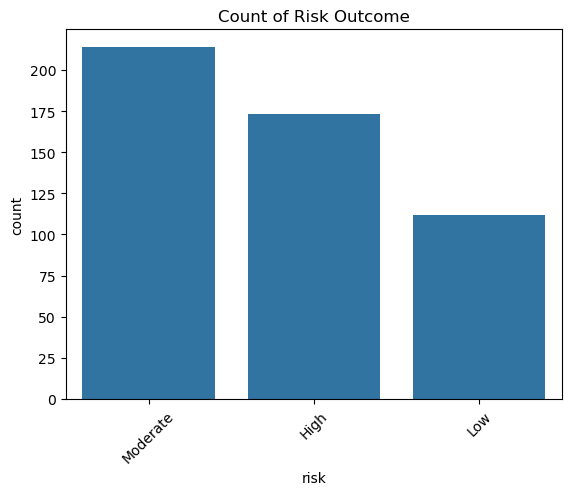

In [15]:
sns.countplot(data=df_drop, x='risk')
plt.title('Count of Risk Outcome')
plt.xticks(rotation=45)
plt.show()

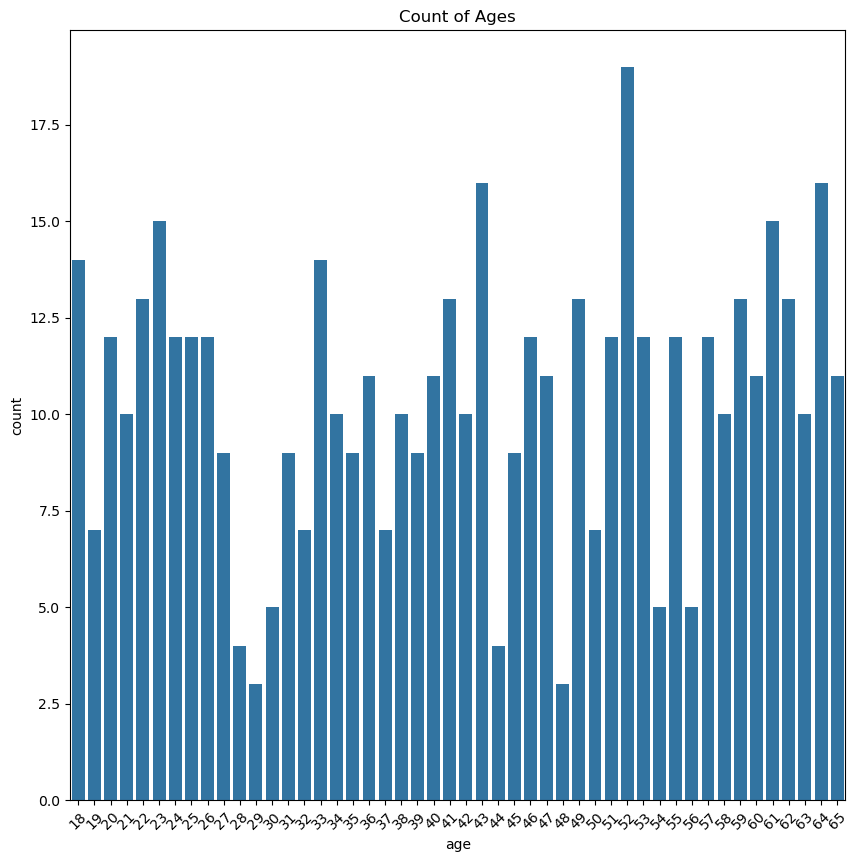

In [17]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df_drop, x='age')
plt.title('Count of Ages')
plt.xticks(rotation=45)
plt.show()

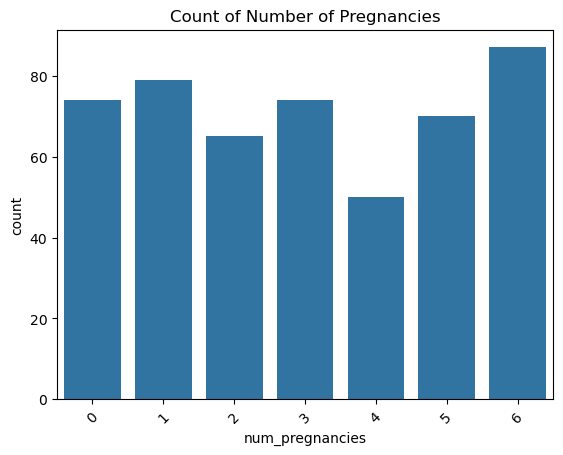

In [18]:
sns.countplot(data=df_drop, x='num_pregnancies')
plt.title('Count of Number of Pregnancies')
plt.xticks(rotation=45)
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
df_encoded = df_drop.copy()
label_encoders = {}

# Encode the target variable
le_target = LabelEncoder()
df_encoded['risk'] = le_target.fit_transform(df_encoded['risk'])

# Encode categorical features
categorical_cols = ['age', 'num_pregnancies', 'smokes', 'hpv_positive', 'sexual_partners', 'early_sexual_activity', 'stds', 'irregular_bleeding', 'contraceptive_use']
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=['risk'])
y = df_encoded['risk']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Grid Search for best SVM polynomial parameters
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
svm_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le_target.classes_)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

Confusion Matrix:
 [[25  0  2]
 [ 0 26  2]
 [ 6  2 37]]

Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.93      0.86        27
         Low       0.93      0.93      0.93        28
    Moderate       0.90      0.82      0.86        45

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.88      0.88      0.88       100



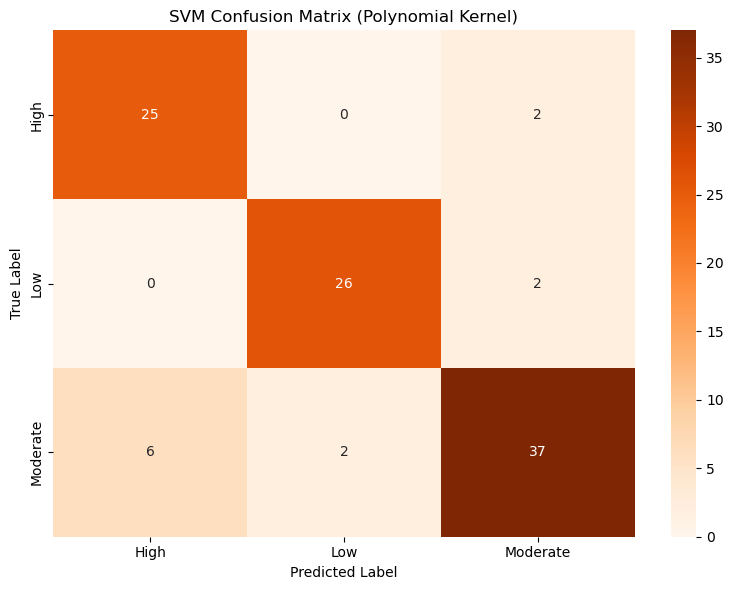

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title("SVM Confusion Matrix (Polynomial Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [23]:
from sklearn.svm import SVC
import joblib


model = SVC()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']